In [1]:
import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
variables =['pr', 'tasmin', 'tasmax']
# read excel files for individual variable and append in one dataframe
all_files =pd.concat({var: pd.read_excel(glob.glob('./dailydatasets/{0}**.xlsx'.format(var))[0], index_col=[0,1,2], header=0).rename({var:'Value'}, axis=1) for var in variables}, axis=0)
all_files

Value
                              time                          
pr     historical BCC-CSM2-MR 1985-01-01 12:00:00   0.001578
                              1985-01-02 12:00:00   0.032430
                              1985-01-03 12:00:00   0.028720
                              1985-01-04 12:00:00   0.035352
                              1985-01-05 12:00:00   0.002428
...                                                      ...
tasmax OBSERVED   OBSERVED    2014-12-27 00:00:00  32.241047
                              2014-12-28 00:00:00  31.044167
                              2014-12-29 00:00:00  28.738087
                              2014-12-30 00:00:00  28.865257
                              2014-12-31 00:00:00  28.817867

[917610 rows x 1 columns]

In [3]:
# plot longterm average precipitation and temperature of observed dataset
monthly_ds_grps= all_files.xs('OBSERVED', level=1).groupby([
    pd.Grouper(level=0),
    pd.Grouper(level=1),
    pd.Grouper(level='time', freq='M')
])
monthly_ds_obs=pd.DataFrame(
    pd.concat({ind: ds.sum() if 'pr' in ds.index.get_level_values(0) else ds.mean() for ind, ds in monthly_ds_grps}, axis=0), columns=['Value']).droplevel(level=-1)
monthly_ds_obs

Value
pr     OBSERVED 1985-01-31    8.338003
                1985-02-28   12.335055
                1985-03-31   30.586675
                1985-04-30  121.392344
                1985-05-31  174.444663
...                                ...
tasmin OBSERVED 2014-08-31   23.959883
                2014-09-30   23.685319
                2014-10-31   23.151088
                2014-11-30   23.270600
                2014-12-31   20.798833

[1080 rows x 1 columns]

In [4]:
# long term monthly observed dataset
monthly_lt_obs= monthly_ds_obs.groupby([
    pd.Grouper(level=0),
    pd.Grouper(level=1),
    monthly_ds_obs.index.get_level_values(level=2).month
]).mean()
monthly_lt_obs

Value
pr     OBSERVED 1     5.256323
                2     9.921922
                3    31.330472
                4    67.382566
                5   134.109414
                6   152.095394
                7   169.527280
                8   184.817688
                9   232.090342
                10  162.802742
                11   47.751546
                12    7.230510
tasmax OBSERVED 1    30.697416
                2    32.404549
                3    33.580288
                4    33.639247
                5    32.244472
                6    31.216084
                7    30.651930
                8    30.359126
                9    29.731617
                10   29.391839
                11   29.419850
                12   29.331443
tasmin OBSERVED 1    20.421434
                2    22.157421
                3    23.836842
                4    24.765130
                5    24.727065
                6    24.503171
                7    24.102647
                8    23.966541
                9    23.504743
                10   22.804842
                11   21.736343
                12   20.148792

No handles with labels found to put in legend.
No handles with labels found to put in legend.


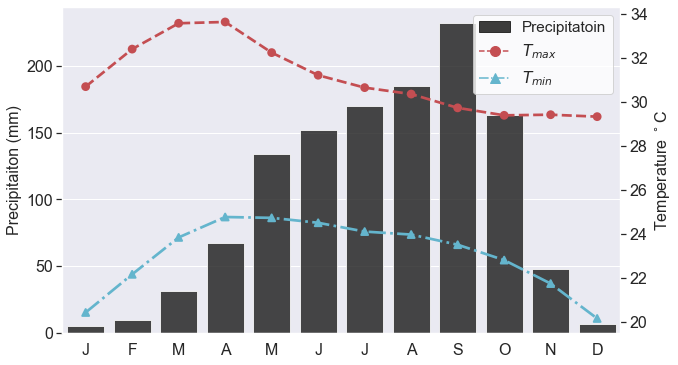

In [5]:
# now add plot
monthly_plt_ds = monthly_lt_obs.reset_index().rename({'level_0':'vars', 'level_1':'Scenarios', 'level_2':'date'}, axis=1)
monthly_plt_ds

# Make plot of observed precipitation and temperature
screen_obs= monthly_plt_ds
months_label=['J','F','M','A','M','J','J','A','S','O','N','D']

# change font scale and style

sns.set(font_scale=1.4)

# set figure and plot

fig_obs, axes_obs= plt.subplots(figsize=(10,6))
axes_obs.grid('whitegrid')
axes_temp = axes_obs.twinx()
axes_temp.grid(None)
bar_pr=sns.barplot(data=screen_obs[screen_obs.vars=='pr'],x='date', y='Value',  color='k', alpha=0.8, ax= axes_obs,)
bar_pr.legend()
#line_tmax=
sns.pointplot(data=screen_obs[screen_obs.vars=='tasmax'], x='date', y='Value',markers='o', linestyles='--', color='r', axes=axes_temp, legend=True)
#line_tmin=
sns.pointplot(data=screen_obs[screen_obs.vars=='tasmin'], x='date', y='Value', markers='^', linestyles='-.', color='c', axes=axes_temp)

#axes_temp.spines.right.set_position(('axes',1.01))
axes_obs.set_xlabel('')
axes_obs.set_xticklabels(months_label, fontsize=16)
axes_obs.tick_params(axis='y',labelsize=16)#set_yticklabels(axes_obs.get_yticklabels(), fontsize=16)
axes_obs.set_ylabel('Precipitaiton (mm)', fontsize=16)

plt.setp(axes_temp.get_yticklabels(), fontsize=16)
axes_temp.set_ylabel('Temperature $^\circ$C', fontsize=16)

axes_obs.legend()

# 

import matplotlib.patches as mpatches
import matplotlib.lines as mlines
bar_patch= mpatches.Patch(color='k', label='Precipitatoin',alpha=0.85)
Tmax_patch= mlines.Line2D([],[], color='r', marker='o', linestyle='--', markersize=10, label='$T_{max}$')
Tmin_patch= mlines.Line2D([],[], color='c', marker='^', markersize=10,linestyle='-.', label='$T_{min}$')
sns.set_style('white')
axes_obs.legend(handles=[bar_patch, Tmax_patch, Tmin_patch], loc=1)
plt.savefig('./longterm average P and Temp plot.png', dpi=600)

In [6]:
# calculate yearly sum and then calculate ensemble
annual_ds_grps = all_files.groupby([
    pd.Grouper(level=0),
    pd.Grouper(level=1),
    pd.Grouper(level=2),
    pd.Grouper(level='time', freq='Y')
])
annual_ds_grps

In [7]:
annual_ds = pd.DataFrame(
    pd.concat({ind: ds.sum() if 'pr' in ds.index.get_level_values(0) else ds.mean() for ind, ds in annual_ds_grps}, axis=0), columns=['Value']).droplevel(level=-1)
annual_ds

Value
pr     OBSERVED OBSERVED   1985-12-31  1263.174916
                           1986-12-31  1220.190387
                           1987-12-31  1085.296275
                           1988-12-31  1169.773626
                           1989-12-31  1210.497534
...                                            ...
tasmin ssp585   MRI-CSM2-0 2096-12-31    26.589231
                           2097-12-31    26.822242
                           2098-12-31    26.742728
                           2099-12-31    26.730877
                           2100-12-31    27.943399

[2514 rows x 1 columns]

In [8]:
#calculate ensemble
ensemble= pd.concat({'ENSEMBLE': annual_ds.groupby([
    pd.Grouper(level=0),
    pd.Grouper(level=1),
    pd.Grouper(level=-1)
]).mean()}).swaplevel(0,1).swaplevel(1,2)

#ensemble

In [9]:
annual_ds_withens= pd.concat([annual_ds, ensemble], axis=0)
annual_ds_withens

Value
pr     OBSERVED OBSERVED 1985-12-31  1263.174916
                         1986-12-31  1220.190387
                         1987-12-31  1085.296275
                         1988-12-31  1169.773626
                         1989-12-31  1210.497534
...                                          ...
tasmin ssp585   ENSEMBLE 2096-12-31    27.238208
                         2097-12-31    27.462240
                         2098-12-31    27.594640
                         2099-12-31    27.271468
                         2100-12-31    27.966592

[3210 rows x 1 columns]

In [10]:
# calulate longterm average annual precipitation and temperature for all models
lt_annual_avg= annual_ds_withens.groupby([
    pd.Grouper(level=0),
    pd.Grouper(level=1),
    pd.Grouper(level=2)
], sort=False).mean()
lt_annual_avg

# calculate percentage change in precipitation and absolute change in temperature
lt_change_ds = pd.DataFrame(
    pd.concat({ind: ds.apply(lambda x: round((x- (ds.xs('OBSERVED', level=-1).Value.values))/ds.xs('OBSERVED', level=-1).Value.values *100, 2) )
               
               if 'pr' in ds.index.get_level_values(0) 
               else ds.apply(lambda x: round(x- ds.xs('OBSERVED', level=-1).Value.values,2) )
               for ind, ds in lt_annual_avg.groupby([
                   pd.Grouper(level=0),
                               
               ], sort=False)}, axis=0), columns=['Value']).droplevel(level=0).reset_index().rename({'level_0':'vars', 'level_1':'Scenarios','level_2':'Models'}, axis=1)
lt_change_ds.Scenarios=lt_change_ds.Scenarios.apply(lambda x: 'SSP2-4.5' if x=='ssp245' else ('SSP5-8.5' if x=='ssp585' else x))
lt_change_ds

,vars,Scenarios,Models,Value
0,pr,OBSERVED,OBSERVED,0.00
1,pr,historical,BCC-CSM2-MR,-0.00
2,pr,historical,Canesm5,-0.00
3,pr,historical,GFDL-CM4,-0.00
4,pr,historical,MRI-CSM2-0,-0.00
5,pr,SSP2-4.5,BCC-CSM2-MR,4.90
6,pr,SSP2-4.5,Canesm5,8.40
7,pr,SSP2-4.5,GFDL-CM4,6.00
8,pr,SSP2-4.5,MRI-CSM2-0,-1.01
9,pr,SSP5-8.5,BCC-CSM2-MR,7.03


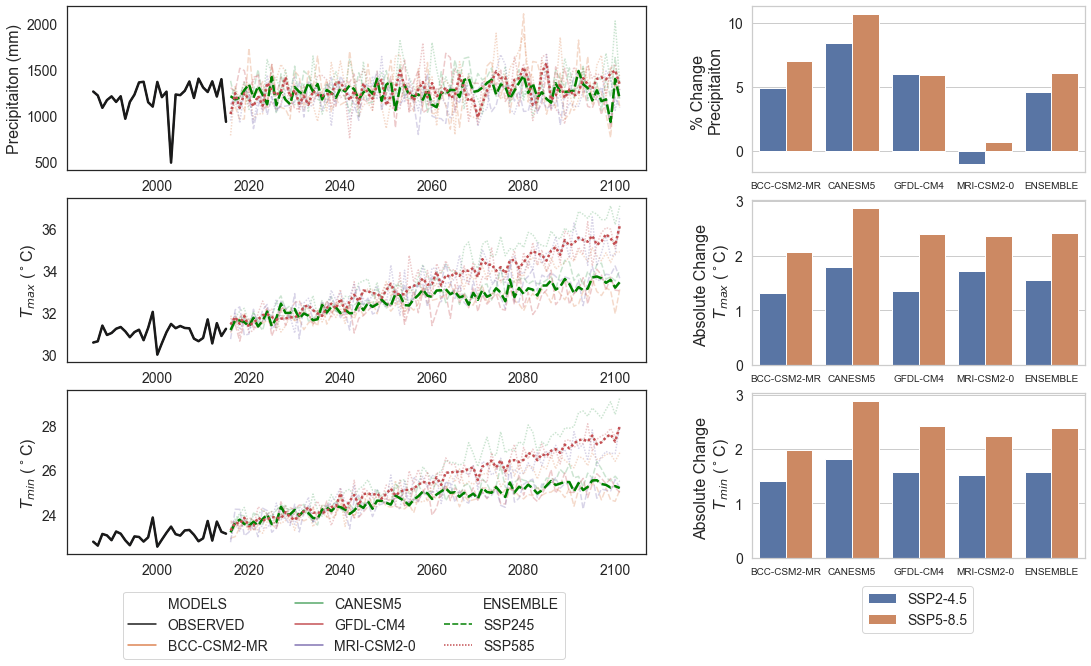

In [19]:
#plot dataset
# create grid specs plot to house line and percentage change plot in same graph
sns.set(font_scale=1.2)
sns.set(style="white")
fig = plt.figure(constrained_layout=True, figsize=(15,8))
subfigs = fig.subfigures(1,2, wspace=0.07, width_ratios= [1.6,1.])

# copy of data
all_ds_yr= annual_ds_withens.reset_index().rename({'level_0':'vars', 'level_1':'Scenarios','level_2':'Models','level_3':'date'}, axis=1)
all_ds_yr= all_ds_yr[all_ds_yr.Scenarios!='historical']
change_ds= lt_change_ds[(lt_change_ds.Scenarios !='historical') &(lt_change_ds.Scenarios!='OBSERVED')]
# labels_changeds=change_ds.Models.unique().tolist()#.remove('OBSERVED')
# print(labels_changeds.remove('OBSERVED'))
formatted_labels =[ label.upper() for label in change_ds.Models.unique().tolist()]
# add subplots to each subfigure

axes_line= subfigs[0].subplots(3,1)
sns.set_style('whitegrid')
for var, ax in zip(['pr','tasmax', 'tasmin'], axes_line.flatten()):
    for model in all_ds_yr.Models.unique():
        if model=='OBSERVED':
            plot_ds_obs= all_ds_yr[all_ds_yr.Models==model]
        elif model=='ENSEMBLE':
            plot_ds_ens= all_ds_yr[all_ds_yr.Models==model]


    
    g= sns.lineplot(data= all_ds_yr[all_ds_yr.vars==var], x='date', y='Value', hue='Models', style='Scenarios', markers=False,ci=0.95, alpha =0.3, ax=ax, legend=True)
    #handles, labels= g.axes.get_legend_handles_labels()
    
    h=sns.lineplot(data= plot_ds_obs[plot_ds_obs.vars==var], x='date', y='Value', color='k', style='Scenarios', ci=0.95, alpha =1, ax=ax, legend=False)
    #i=sns.lineplot(data= plot_ds_ens[plot_ds_ens.vars==var], x='date', y='Value', palette=['red','green'], style='Models', dashes=[(4,1),(3,3)], ci=0.95, alpha =1, markers=False, ax=ax, legend=True)
    i=sns.lineplot(data= plot_ds_ens[plot_ds_ens.vars==var], x='date', y='Value',linewidth=2.5, palette=['k','green','r'], dashes=True, hue='Scenarios', style='Scenarios', ci=0.95, alpha =1, ax=ax, legend=True)
   
    ax.legend().set_visible(False)
    ax.set_xlabel('')
    ax.tick_params(axis='both', labelsize=14)
[ax.set_ylabel(vari, fontsize=16)for ax, vari in zip(fig.axes, ['Precipitaiton (mm)','$T_{max}$ ($^\circ$C)', '$T_{min}$ ($^\circ$C)'])]

# Access the legend handles and labels of g and i axes 
lines, labels=h.axes.get_legend_handles_labels()
lines1, labels1= g.axes.get_legend_handles_labels()
#create dictionary of lines and labels and update the key value pair of h to g and plot legend
g_llb= {lbl.upper(): val for lbl, val in  zip(labels1, lines1)}
h_llb ={lbl.upper(): val for lbl, val in zip(labels, lines)}
g_llb.update({key: value for key, value in h_llb.items() if key})
# remove Ensemble from dict and add Rename Scenarios with Ensemble
del g_llb['ENSEMBLE']

g_llb=dict(('ENSEMBLE', val) if k=='Scenarios'.upper() else (k,val) for k, val in g_llb.items())

#handles, labels =ax.get_legend_handles_labels()
fig.legend(g_llb.values(), g_llb.keys(),ncol=3, loc='lower left', bbox_to_anchor=[0.1,-0.15,0.1,0.1], fontsize=14)


axes_bar= subfigs[1].subplots(3,1)

for g_ax, var in zip(axes_bar.flatten(), np.unique(change_ds.vars)):
    data= change_ds[change_ds.vars==var]
    g_bar= sns.barplot(data= data, x='Models', y='Value', hue='Scenarios', ax=g_ax)
    g_bar.legend().set_visible(False)
    g_bar.set_xlabel('')
    g_bar.set_xticklabels(labels = formatted_labels,fontsize=10)
    g_ax.tick_params(axis='y', labelsize=14)
[g_ax.set_ylabel(name, fontsize=16) for g_ax, name in zip(axes_bar.flatten(), ['% Change \nPrecipitaiton','Absolute Change \n $T_{max}$ ($^\circ$C)', 'Absolute Change \n $T_{min}$ ($^\circ$C)'])]
handles, labels = g_ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=[0.8, -0.1, 0.1, 0.1], fontsize=14)

plt.savefig('./P_Temp_long term average annual.png', dpi=600, bbox_inches='tight')

In [84]:
# extract ensemble and append the min max values of model  and remove historical
ens_only=annual_ds_withens.xs('ENSEMBLE', level=2).drop('historical', level=1)

yearly_max_values = annual_ds_withens.drop('historical',level=1).groupby([
    pd.Grouper(level=0),
    pd.Grouper(level=1),
    pd.Grouper(level=-1),
    
]).max().rename({'Value':'maxs'}, axis=1)
yearly_min_values =annual_ds_withens.drop('historical',level=1).groupby([
    pd.Grouper(level=0),
    pd.Grouper(level=1),
    pd.Grouper(level=-1),
    
]).min().rename({'Value':'mins'}, axis=1)

shaded_plt_data= pd.concat([ens_only, yearly_max_values, yearly_min_values], axis=1).dropna(True)
shaded_plt_data

Value         maxs         mins
pr     OBSERVED 1985-12-31  1263.174916  1263.174916  1263.174916
                1986-12-31  1220.190387  1220.190387  1220.190387
                1987-12-31  1085.296275  1085.296275  1085.296275
                1988-12-31  1169.773626  1169.773626  1169.773626
                1989-12-31  1210.497534  1210.497534  1210.497534
...                                 ...          ...          ...
tasmin ssp585   2096-12-31    27.238208    28.331182    26.510540
                2097-12-31    27.462240    28.715008    26.697823
                2098-12-31    27.594640    29.066441    26.708058
                2099-12-31    27.271468    28.491531    26.382458
                2100-12-31    27.966592    29.238548    26.768208

[606 rows x 3 columns]

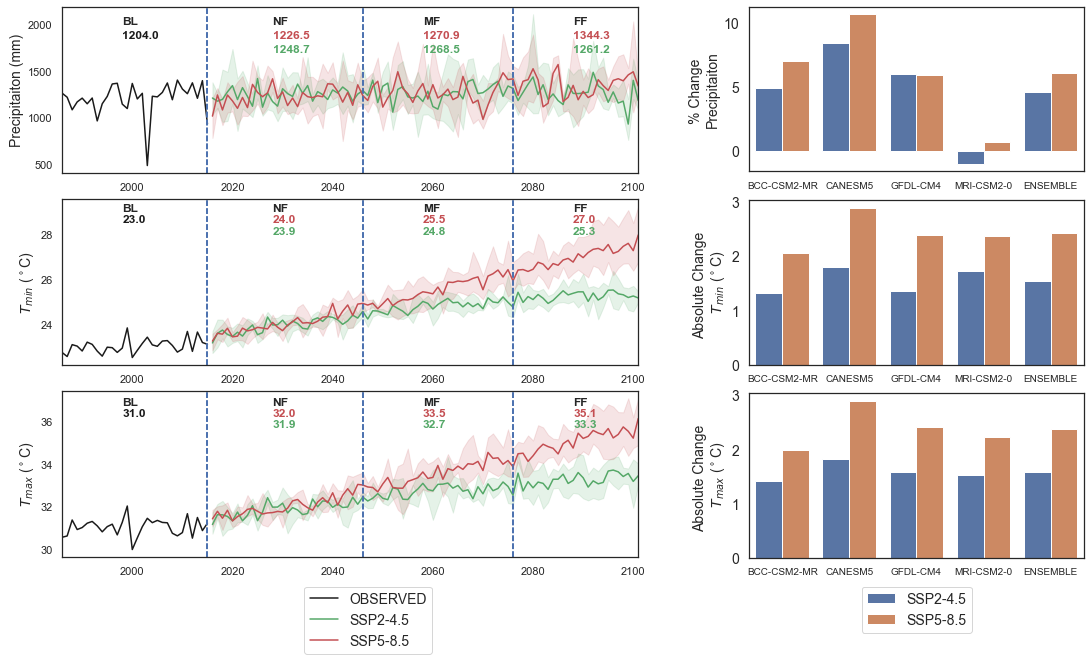

In [152]:
# plot all in one
sns.set(style="white")
fig = plt.figure(constrained_layout=True, figsize=(15,8))
subfigs = fig.subfigures(1,2, wspace=0.07, width_ratios= [1.6,1.])

# copy of data
all_ds_yr= annual_ds_withens.reset_index().rename({'level_0':'vars', 'level_1':'Scenarios','level_2':'Models','level_3':'date'}, axis=1)
all_ds_yr= all_ds_yr[all_ds_yr.Scenarios!='historical']
change_ds= lt_change_ds[(lt_change_ds.Scenarios !='historical') &(lt_change_ds.Scenarios!='OBSERVED')]
# labels_changeds=change_ds.Models.unique().tolist()#.remove('OBSERVED')
# print(labels_changeds.remove('OBSERVED'))
formatted_labels =[ label.upper() for label in change_ds.Models.unique().tolist()]
# add subplots to each subfigure
axes_line= subfigs[0].subplots(3,1)

text_positions = [2000, 29, 36.75]
diff =[150, 0.5, 0.5]

texts=['BL', 'NF', 'MF','FF']
plt_scs =['OBSERVED', 'SSP2-4.5', 'SSP5-8.5']
handles=[]
plt_colors=['k', 'g','r']
for ind, ax in enumerate(axes_line.flatten()):
    plt_df = shaded_plt_data.xs(variables[ind], level=0).rename({'Value':variables[ind]}, axis=1)
    plt_scens = plt_df.index.get_level_values(0).unique().to_list()
    vr=variables[ind]
    
    for i, sc in enumerate(plt_scens):
    
        line=ax.plot(plt_df.xs(sc).index, plt_df.xs(sc)[vr], color=plt_colors[i])
        handles.append(line)
        if sc!='OBSERVED':
            ax.fill_between(plt_df.xs(sc).index, plt_df.xs(sc).maxs, plt_df.xs(sc).mins, color= plt_colors[i], alpha=0.15)
        #ax.set_ylabel('Precipitation (mm)')
        ax.axvline(x=plt_df.xs('OBSERVED').index[29], linestyle='--', color='b')
        ax.axvline(x=plt_df.xs('ssp245').index[30], linestyle='--', color='b')
        ax.axvline(x=plt_df.xs('ssp245').index[60], linestyle='--', color='b')
        ax.set_xlim(plt_df.xs('OBSERVED').index.min(), plt_df.xs('ssp245').index.max())

        #ax.legend(line, plt_scs[i])
   

    j=12
    times=[slice('1985-01-01','2014-12-31'), slice('2015-01-01','2044-12-31'), slice('2045-01-01','2074-12-31'), slice('2075-01-01','2100-12-31')]
    for i, txt in enumerate(texts):

        if i==0:
            ax.text(plt_df.xs('OBSERVED').index[j], text_positions[ind], s= texts[i], fontweight='bold') 
            ax.text(plt_df.xs('OBSERVED').index[j], text_positions[ind] -diff[ind], s=round(plt_df.xs('OBSERVED')[vr].mean(),0), color='k', fontweight='bold')
        else:
            ax.text(plt_df.xs('ssp245').index[j], text_positions[ind], s= texts[i], fontweight='bold') 
            #print(i,times[i])
            ax.text(plt_df.xs('ssp585').index[j], text_positions[ind] -diff[ind], s=round(plt_df.xs('ssp585').loc[times[i]][vr].mean(),1), color='r',  fontweight='bold')
            ax.text(plt_df.xs('ssp245').index[j], text_positions[ind] -2*diff[ind], s=round(plt_df.xs('ssp245').loc[times[i]][vr].mean(),1), color='g',  fontweight='bold')

            j=j+30
[ax.set_ylabel(vari, fontsize=14)for ax, vari in zip(fig.axes, ['Precipitaiton (mm)', '$T_{min}$ ($^\circ$C)', '$T_{max}$ ($^\circ$C)'])]


# Access the legend handles and labels of g and i axes 
lines, labels=h.axes.get_legend_handles_labels()
lines1, labels1= g.axes.get_legend_handles_labels()
#create dictionary of lines and labels and update the key value pair of h to g and plot legend
g_llb= {lbl.upper(): val for lbl, val in  zip(labels1, lines1)}
h_llb ={lbl.upper(): val for lbl, val in zip(labels, lines)}
g_llb.update({key: value for key, value in h_llb.items() if key})
# remove Ensemble from dict and add Rename Scenarios with Ensemble
del g_llb['ENSEMBLE']

g_llb=dict(('ENSEMBLE', val) if k=='Scenarios'.upper() else (k,val) for k, val in g_llb.items())

#handles, labels =ax.get_legend_handles_labels()
fig.legend(handles=[item for sublist in handles for item in sublist], labels=['OBSERVED', 'SSP2-4.5','SSP5-8.5'], bbox_to_anchor= [0.30, -0.1, 0.1, 0.1], fontsize=14)
#fig.legend(g_llb.values(), g_llb.keys(),ncol=3, loc='lower left', bbox_to_anchor=[0.1,-0.15,0.1,0.1], fontsize=14)


axes_bar= subfigs[1].subplots(3,1)

for g_ax, var in zip(axes_bar.flatten(), np.unique(change_ds.vars)):
    data= change_ds[change_ds.vars==var]
    g_bar= sns.barplot(data= data, x='Models', y='Value', hue='Scenarios', ax=g_ax)
    g_bar.legend().set_visible(False)
    g_bar.set_xlabel('')
    g_bar.set_xticklabels(labels = formatted_labels,fontsize=10)
    g_ax.tick_params(axis='y', labelsize=14)
[g_ax.set_ylabel(name, fontsize=14) for g_ax, name in zip(axes_bar.flatten(), ['% Change \nPrecipitaiton', 'Absolute Change \n $T_{min}$ ($^\circ$C)', 'Absolute Change \n $T_{max}$ ($^\circ$C)', ])]
handles, labels = g_ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=[0.8, -0.1, 0.1, 0.1], fontsize=14)
#plt.tight_layout()
#plt.savefig('./Long term average P, Tmax and Tmin for Cambodia with per change.png', dpi=600, bbox_inches='tight' )